<a href="https://colab.research.google.com/github/Lavanya8484/Celebal_Summer_Internship/blob/main/Main_Project/CustomerSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Preprocessing the Data
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
df = pd.read_csv("Mall_Customers.csv")
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
X = df[['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

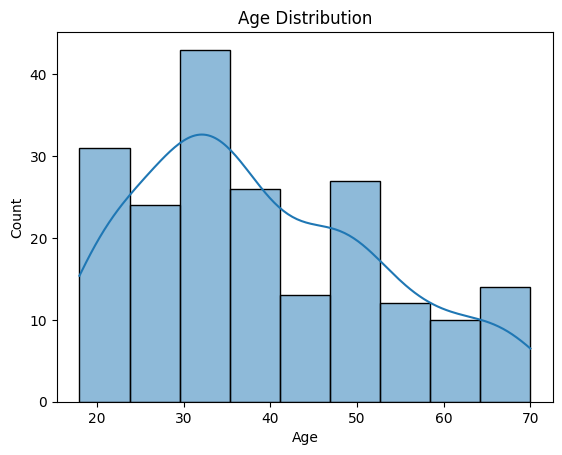

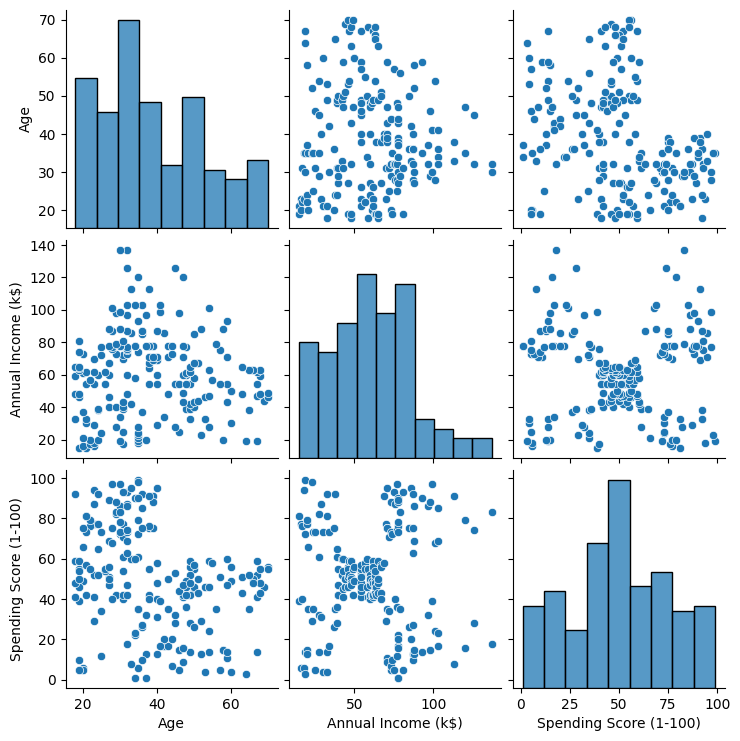

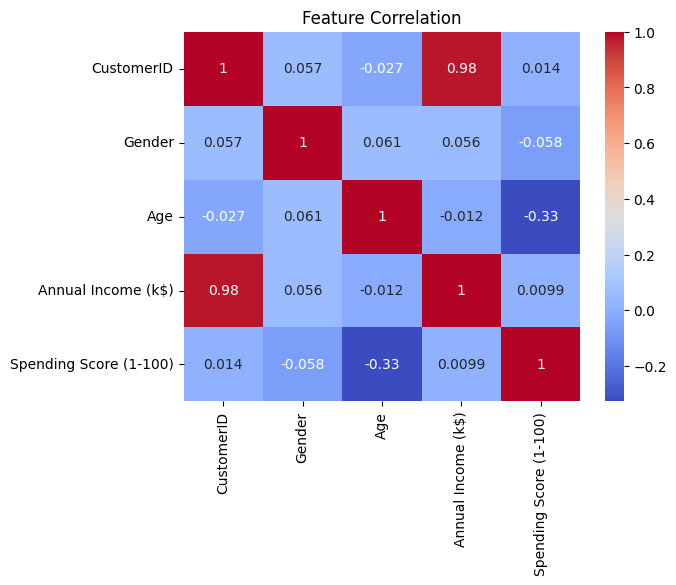

In [2]:
# Exploratory data analysis
import seaborn as sns
import matplotlib.pyplot as plt

# Distribution plots
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Pairplot
sns.pairplot(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])
plt.show()

sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation')
plt.show()

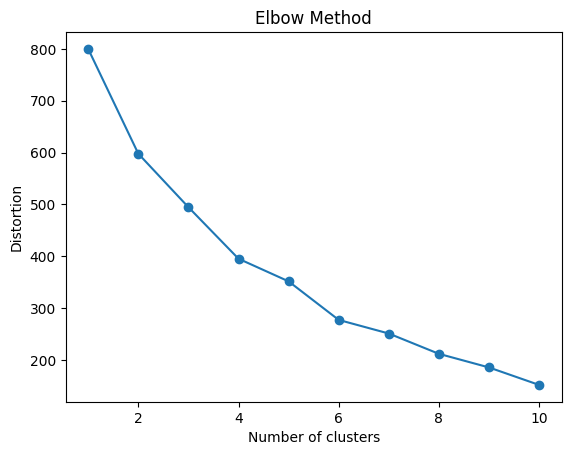

In [3]:
# K-Means clustering
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters=i, random_state=42)
    km.fit(X_scaled)
    distortions.append(km.inertia_)

plt.plot(range(1, 11), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# KMeans Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(X_scaled)
df['Cluster'] = kmeans.labels_

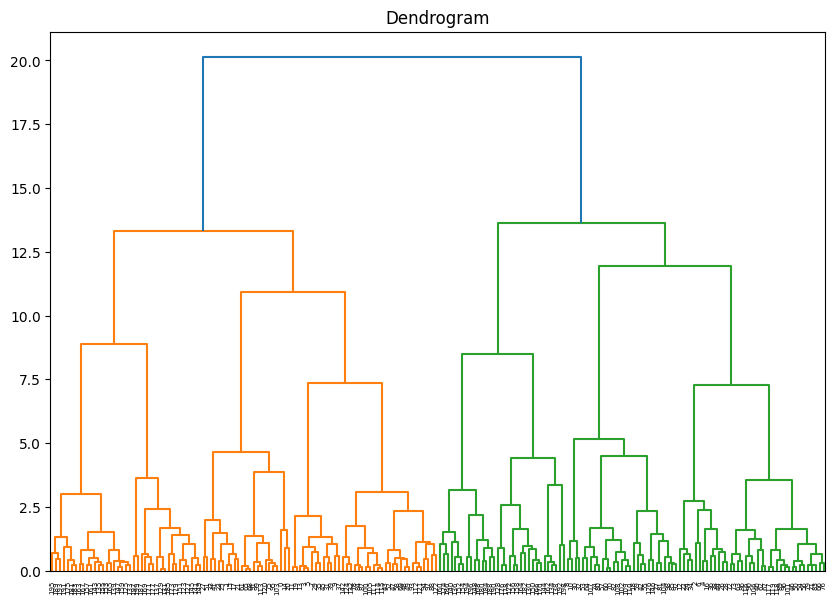

In [4]:
# hierarchical clusrering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

linked = linkage(X_scaled, method='ward')
plt.figure(figsize=(10, 7))
dendrogram(linked)
plt.title('Dendrogram')
plt.show()
hc = AgglomerativeClustering(n_clusters=5)
df['HC_Cluster'] = hc.fit_predict(X_scaled)

In [5]:
# Mean values for each cluster
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.509804  56.470588           46.098039   
1        159.500000  1.000000  39.500000           85.150000   
2        100.809524  1.000000  28.690476           60.904762   
3        151.510204  0.000000  37.897959           82.122449   
4         50.526316  0.000000  27.315789           38.842105   

         Spending Score (1-100)  HC_Cluster  
Cluster                                      
0                     39.313725    3.411765  
1                     14.050000    2.200000  
2                     70.238095    0.619048  
3                     54.448980    1.428571  
4                     56.210526    0.552632  


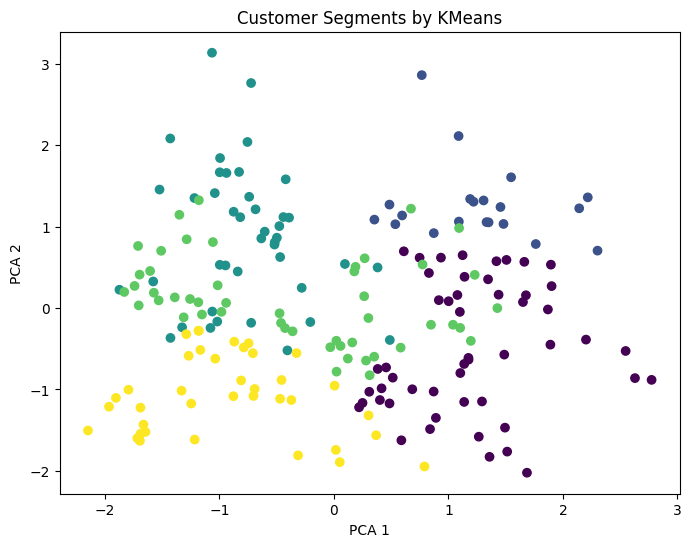

In [6]:
# result
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments by KMeans')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()